## Markov Chain Analysis of a Ball-Passing Game

In [3]:
import numpy as np
import pandas as pd
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt

# 5.8a: Expected throws until Jim first gets the ball
def solve_5_8a():
    E_T = 1.8
    E_S = 1 + (1/3) * E_T
    return E_T, E_S

# 5.8b: Jim throws to Tim (2/3), or runs away (1/3)
def solve_5_8b():
    E_T = 294 / 90
    E_J = (2/3) * (1 + E_T)
    E_S = 1 + (1/3) * E_T + (2/3) * E_J
    return E_T, E_S, E_J

# 5.8c: Jim throws to Tim on first catch, runs away on second
def solve_5_8c_numerical(iterations=20):
    E_T = 0
    for _ in range(iterations):
        E_S = 5/3 + E_T
        E_J1 = 1 + E_T
        E_T = 1 + 0.5 * E_S + 0.5 * E_J1
    E_S = 5/3 + E_T
    E_J1 = 1 + E_T
    return E_T, E_S, E_J1

# 5.8d: Compare all results and show relationships
def solve_5_8d():
    E_T_a, E_S_a = solve_5_8a()
    E_T_b, E_S_b, E_J_b = solve_5_8b()
    E_T_c, E_S_c, E_J1_c = solve_5_8c_numerical()

    df = pd.DataFrame({
        "Scenario": ["5.8a: Until Jim first gets ball",
                     "5.8b: Jim may run away (1/3)",
                     "5.8c: Jim runs after 2nd ball"],
        "E(Tim)": [E_T_a, E_T_b, E_T_c],
        "E(Sam)": [E_S_a, E_S_b, E_S_c],
        "E(Jim or Jim1)": [None, E_J_b, E_J1_c]
    })

    return df

# Optional: Display transition matrices
def show_transition_matrices():
    states = ['T', 'S', 'B', 'J']

    transition_matrix_5_8a = [
        [0, 0.5, 0, 0.5],
        [1/3, 0, 0, 2/3],
        [0, 1, 0, 0],
        [0, 0, 0, 1],  # absorbing
    ]

    transition_matrix_5_8b = [
        [0, 0.5, 0, 0.5],
        [1/3, 0, 0, 2/3],
        [0, 1, 0, 0],
        [2/3, 0, 0, 0],
    ]

    transition_matrix_5_8c = [
        [0, 0.5, 0, 0.5],
        [1/3, 0, 0, 2/3],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
    ]

    print("Transition Matrix 5.8a:")
    print(pd.DataFrame(transition_matrix_5_8a, index=states, columns=states), "\n")

    print("Transition Matrix 5.8b:")
    print(pd.DataFrame(transition_matrix_5_8b, index=states, columns=states), "\n")

    print("Transition Matrix 5.8c:")
    print(pd.DataFrame(transition_matrix_5_8c, index=states, columns=states), "\n")


# ========== Run and Show All Results ==========
if __name__ == "__main__":
    print("5.8a Results:")
    E_T_a, E_S_a = solve_5_8a()
    print(f"E(Tim): {E_T_a:.2f}, E(Sam): {E_S_a:.2f}\n")

    print("5.8b Results:")
    E_T_b, E_S_b, E_J_b = solve_5_8b()
    print(f"E(Tim): {E_T_b:.2f}, E(Sam): {E_S_b:.2f}, E(Jim): {E_J_b:.2f}\n")

    print("5.8c Results (Numerical Approx):")
    E_T_c, E_S_c, E_J1_c = solve_5_8c_numerical()
    print(f"E(Tim): {E_T_c:.2f}, E(Sam): {E_S_c:.2f}, E(Jim first): {E_J1_c:.2f}\n")

    print("5.8d Comparison Table:")
    df_compare = solve_5_8d()
    print(df_compare)

    # Optional: Show transition matrices
    print("\n--- Transition Matrices ---")
    show_transition_matrices()


5.8a Results:
E(Tim): 1.80, E(Sam): 1.60

5.8b Results:
E(Tim): 3.27, E(Sam): 3.99, E(Jim): 2.84

5.8c Results (Numerical Approx):
E(Tim): 46.67, E(Sam): 48.33, E(Jim first): 47.67

5.8d Comparison Table:
                          Scenario     E(Tim)     E(Sam)  E(Jim or Jim1)
0  5.8a: Until Jim first gets ball   1.800000   1.600000             NaN
1     5.8b: Jim may run away (1/3)   3.266667   3.985185        2.844444
2    5.8c: Jim runs after 2nd ball  46.666667  48.333333       47.666667

--- Transition Matrices ---
Transition Matrix 5.8a:
          T    S  B         J
T  0.000000  0.5  0  0.500000
S  0.333333  0.0  0  0.666667
B  0.000000  1.0  0  0.000000
J  0.000000  0.0  0  1.000000 

Transition Matrix 5.8b:
          T    S  B         J
T  0.000000  0.5  0  0.500000
S  0.333333  0.0  0  0.666667
B  0.000000  1.0  0  0.000000
J  0.666667  0.0  0  0.000000 

Transition Matrix 5.8c:
          T    S  B         J
T  0.000000  0.5  0  0.500000
S  0.333333  0.0  0  0.666667
B  0.000

## Graph Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_17724\2018243102.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


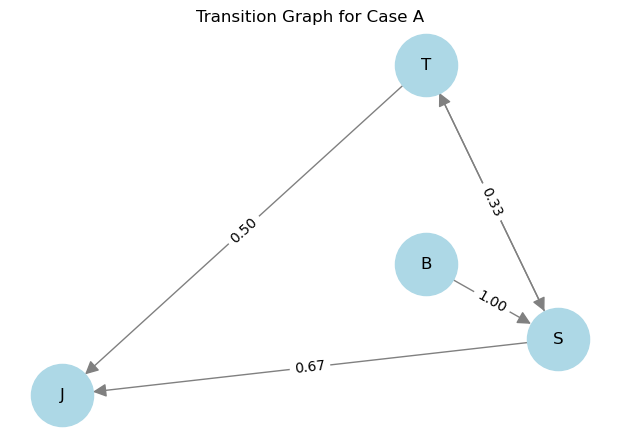

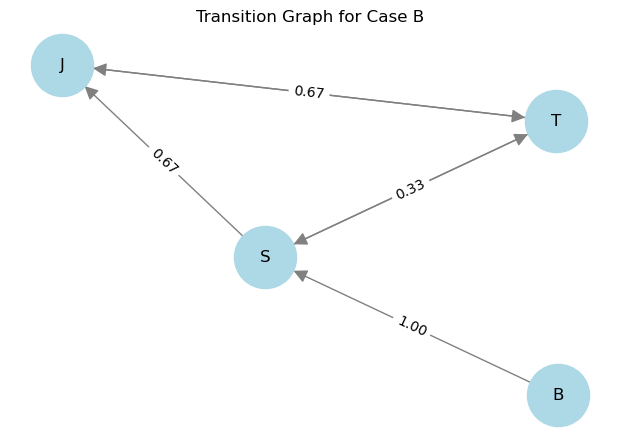

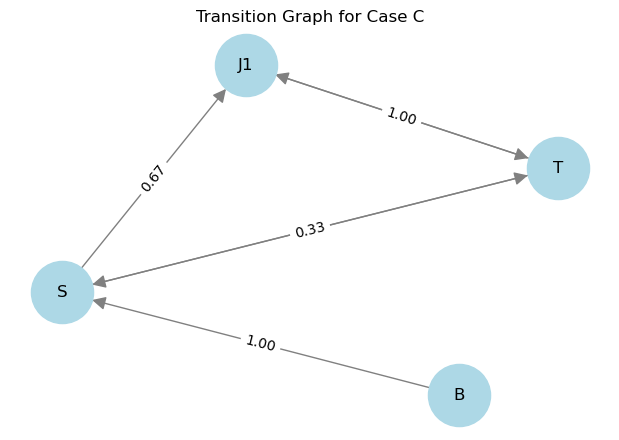

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the state transitions for each case
def get_graph_edges(case='a'):
    if case == 'a':
        return [('T', 'S', 0.5), ('T', 'J', 0.5),
                ('S', 'T', 1/3), ('S', 'J', 2/3),
                ('B', 'S', 1.0)]
    elif case == 'b':
        return [('T', 'S', 0.5), ('T', 'J', 0.5),
                ('S', 'T', 1/3), ('S', 'J', 2/3),
                ('B', 'S', 1.0),
                ('J', 'T', 2/3)]  # 1/3 run away not shown
    elif case == 'c':
        return [('T', 'S', 0.5), ('T', 'J1', 0.5),
                ('S', 'T', 1/3), ('S', 'J1', 2/3),
                ('B', 'S', 1.0),
                ('J1', 'T', 1.0)]  # second visit leads to run away
    else:
        return []

# Draw the graph using networkx and matplotlib
def draw_graph(case):
    edges = get_graph_edges(case)
    G = nx.DiGraph()

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f'{w:.2f}' for u, v, w in edges}

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
            font_size=12, arrowsize=20, edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title(f"Transition Graph for Case {case.upper()}")
    plt.tight_layout()
    plt.show()

# Draw all three graphs for cases a, b, and c
for case in ['a', 'b', 'c']:
    draw_graph(case)